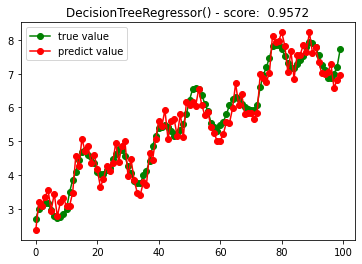

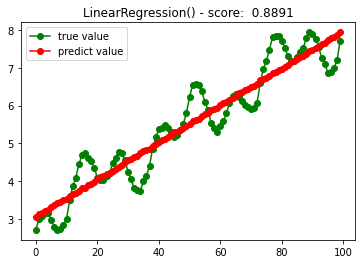

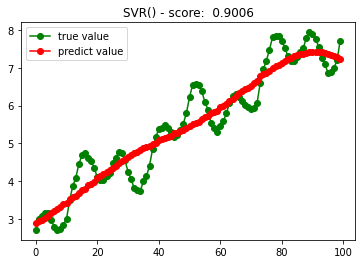

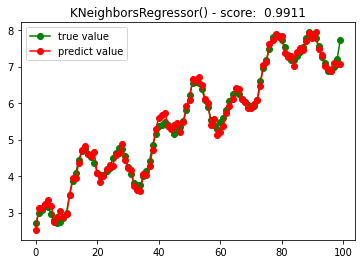

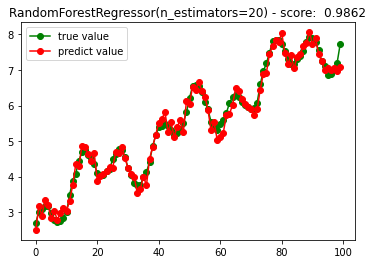

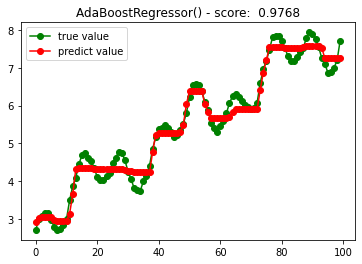

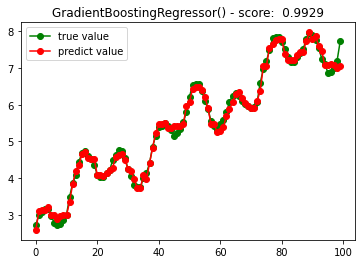

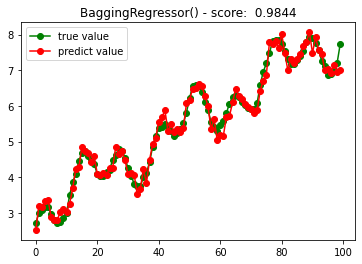

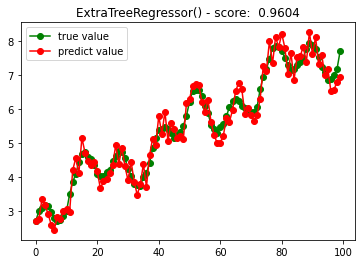

In [23]:
import numpy as np
import matplotlib.pyplot as plt


########### 1.数据生成部分 ##########
def f(x1, x2):
    y = 0.5 * np.sin(x1) + 0.5 * np.cos(x2) + 3 + 0.1 * x1
    return y


def load_data():
    x1_train = np.linspace(0, 50, 500)
    x2_train = np.linspace(-10, 10, 500)
    data_train = np.array(
        [
            [x1, x2, f(x1, x2) + (np.random.random(1)[0] - 0.5)]
            for x1, x2 in zip(x1_train, x2_train)
        ]
    )
    x1_test = np.linspace(0, 50, 100) + 0.5 * np.random.random(100)
    x2_test = np.linspace(-10, 10, 100) + 0.02 * np.random.random(100)
    data_test = np.array([[x1, x2, f(x1, x2)] for x1, x2 in zip(x1_test, x2_test)])
    return data_train, data_test


train, test = load_data()
x_train, y_train = train[:, :2], train[:, 2]  # 数据前两列是x1,x2 第三列是y,这里的y有随机噪声
x_test, y_test = test[:, :2], test[:, 2]  # 同上,不过这里的y没有噪声


########### 2.回归部分 ##########
def try_different_method(model):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test, "go-", label="true value")
    plt.plot(np.arange(len(result)), result, "ro-", label="predict value")
    plt.title(f"{str(model)} - score: {score:< .4f}")
    plt.legend()
    plt.show()


########### 3.具体方法选择##########
#### 3.1 决策树回归 ####
from sklearn import tree

model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
try_different_method(model_DecisionTreeRegressor)
#### 3.2 线性回归 ####
from sklearn import linear_model

model_LinearRegression = linear_model.LinearRegression()
try_different_method(model_LinearRegression)

#### 3.3 SVM回归 ####
from sklearn import svm

model_SVR = svm.SVR()
try_different_method(model_SVR)


#### 3.4 KNN回归 ####
from sklearn import neighbors

model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
try_different_method(model_KNeighborsRegressor)


#### 3.5 随机森林回归 ####
from sklearn import ensemble

# 这里使用20个决策树
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)
try_different_method(model_RandomForestRegressor)


#### 3.6 Adaboost回归 ####
from sklearn import ensemble

model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)  # 这里使用50个决策树
try_different_method(model_AdaBoostRegressor)


#### 3.7 GBRT回归 ####
from sklearn import ensemble

# 这里使用100个决策树
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)
try_different_method(model_GradientBoostingRegressor)


#### 3.8 Bagging回归 ####
from sklearn.ensemble import BaggingRegressor

model_BaggingRegressor = BaggingRegressor()
try_different_method(model_BaggingRegressor)


#### 3.9 ExtraTree极端随机树回归 ####
from sklearn.tree import ExtraTreeRegressor

model_ExtraTreeRegressor = ExtraTreeRegressor()
try_different_method(model_ExtraTreeRegressor)